Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2021/2022  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2021 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **24. listopada 2021. u 23:59h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od četiri zadatka, te tri dodatna zadatka koji se **ne boduju**. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [215]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\38599\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [383]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [217]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje
pf = PolynomialFeatures(degree=1)
design = pf.fit_transform(X)
print(design)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

Weights manually:  [2.2        0.45714286]
Weights with pinv: [2.2        0.45714286]


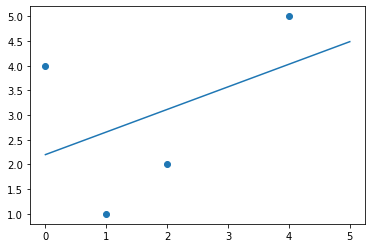

In [229]:
from numpy import linalg
# Vaš kôd ovdje
design_T = np.transpose(design)
pinv_manual = np.dot(linalg.inv(linalg.multi_dot([design_T, design])), design_T)
pinv_func = linalg.pinv(design)

w_manual = linalg.multi_dot([pinv_manual, y])
w_func = linalg.multi_dot([pinv_func, y])

print("Weights manually:  " + str(w_manual))
print("Weights with pinv: " + str(w_func))

z = np.array([0,1,2,3,4,5])
plt.plot(z, w_func[1]*z + w_func[0], linestyle='solid')
plt.scatter(X,y)

Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [230]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje
h = linalg.multi_dot([w, np.transpose(design)]) # (aTb)T = bT(aT)T = bTa
#print(h)

E = sklearn.metrics.mean_squared_error(y,h)
print("E: "+ str(E))



Error: 2.042857142857143


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.


Error: 1.9721522630525295e-31


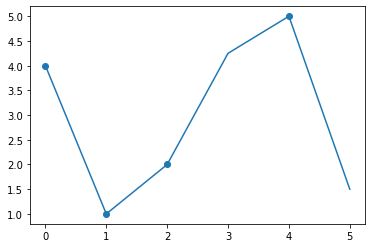

In [231]:
# Vaš kôd ovdje
# w_with_inv = linalg.multi_dot([linalg.inv(design), y])  there is no inverse!

# pf2 = PolynomialFeatures(degree=2)
# design2 = pf2.fit_transform(X)
# print(design2)
# w_with_inv = linalg.multi_dot([linalg.inv(design2), y]) there is no inverse!

pf3 = PolynomialFeatures(degree=3)
design3 = pf3.fit_transform(X)
w_with_inv = linalg.multi_dot([linalg.inv(design3), y]) # success

h3 = linalg.multi_dot([w_with_inv, np.transpose(design3)])
E3 = sklearn.metrics.mean_squared_error(y,h3)
print("E: " + str(E3)) # negligible

z = np.array([0,1,2,3,4,5])
plt.plot(z, w_with_inv[3]*z*z*z + w_with_inv[2]*z*z + w_with_inv[1]*z + w_with_inv[0], linestyle='solid')
plt.scatter(X,y)
# passes through all of the observations exactly, overfitted

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [232]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje
linreg = LinearRegression().fit(X, y)
print("Weights: [" + str(linreg.intercept_) + "        "+ str(linreg.coef_[0]) + "]")

E_linreg = sklearn.metrics.mean_squared_error(y, linreg.predict(X))
print("E: "+ str(E_linreg))
print("Same as the one previously calculated: " + str(abs(E - E_linreg) < 10e-6))

Weights: [2.2        0.45714285714285713]
Error: 2.042857142857143
Same as the one previously calculated: True


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [258]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    labels = []
    for i in range(len(X)):
        labels.append(f(X[i][0]) + normal(0, noise))
    return labels

In [403]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

data = make_instances(-5, 5, 50)

In [283]:
# Vaš kôd ovdje
def custom_f(x) : 
    return 5 + x - 2*x*x - 5*x*x*x

labels = make_labels(data, custom_f, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

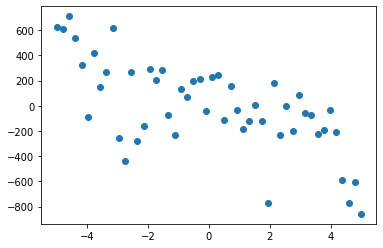

In [284]:
# Vaš kôd ovdje
plt.scatter(data, labels)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

E: 52125.55909468206


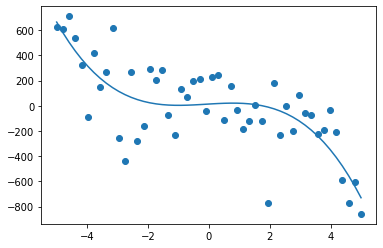

In [285]:
# Vaš kôd ovdje
pf = PolynomialFeatures(degree=3)
design = pf.fit_transform(data)

w = linalg.multi_dot([linalg.pinv(design), labels])
h = linalg.multi_dot([w, np.transpose(design)])

E_data = sklearn.metrics.mean_squared_error(labels,h)
print("E: " + str(E_data))

plt.scatter(data, labels)
plt.plot(data, h)

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

d = 1
E: 67514.26609749705

d = 3
E: 52125.55909468206

d = 5
E: 48706.45516981005

d = 10
E: 42692.48940431392

d = 20
E: 31193.372886942605



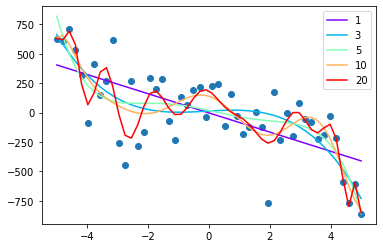

In [288]:
# Vaš kôd ovdje
plt.scatter(data, labels)
color = iter(cm.rainbow(np.linspace(0, 1, 5)))
for i in [1,3,5,10,20]:
    pf_i = PolynomialFeatures(degree=i)
    design_i = pf_i.fit_transform(data)
    w_i = linalg.multi_dot([linalg.pinv(design_i), labels])
    h_i = linalg.multi_dot([w_i, np.transpose(design_i)])
    E_i = sklearn.metrics.mean_squared_error(labels,h_i)
    
    plt.plot(data, h_i, color = next(color), label=i)
    print("d = " + str(i) + "\nE: " + str(E_i) + "\n")
    
plt.legend()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

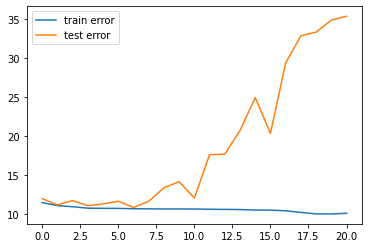

In [419]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje
# calculating:
train, test, labels_train, labels_test = train_test_split(data, labels, test_size=0.5)
E_train = []
E_test = []
for i in range(21):
    pf_i = PolynomialFeatures(degree=i)
    design_i = pf_i.fit_transform(train)
    w_i = linalg.multi_dot([linalg.pinv(design_i), labels_train])
    
    h_i_train = linalg.multi_dot([w_i, np.transpose(design_i)])
    E_i_train = sklearn.metrics.mean_squared_error(labels_train, h_i_train)
    E_train.append(E_i_train)
    
    design_i_test = pf_i.fit_transform(test)
    h_i_test = linalg.multi_dot([w_i, np.transpose(design_i_test)])
    E_i_test = sklearn.metrics.mean_squared_error(labels_test, h_i_test)
    E_test.append(E_i_test)

# graphing:
plt.plot(range(21), np.log(E_train), label="train error")
plt.plot(range(21), np.log(E_test), label="test error")
plt.legend()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

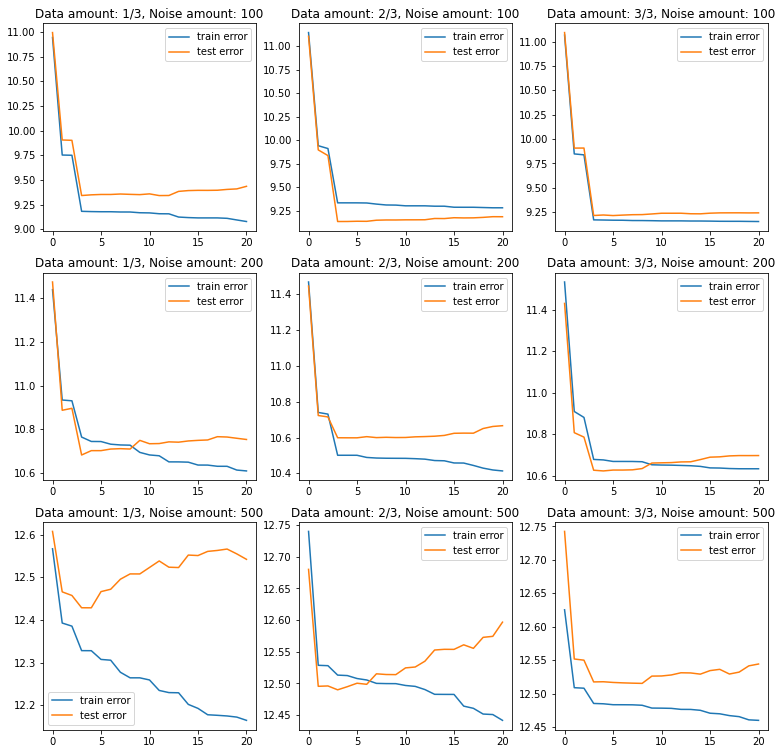

In [412]:
# Vaš kôd ovdje
# data setup:
dataset = make_instances(-5, 5, 1000)

train100, test100 = train_test_split(dataset, test_size=0.5)
train200 = train100.copy()
train500 = train100.copy()
test200 = test100.copy()
test500 = test100.copy()

all_train = [train100, train200, train500]
all_test = [test100, test200, test500]

# train100 1/3 train100 2/3 train100 cijeli | train200 1/3 train200 2/3 train200 cijeli | train500 1/3 train500 2/3 train500 cijeli

# takes a list of 3 identical arrays and generates two lists of 9 arrays with different sizes and noise amounts 
def generate(list_of_examples):
    x_all_train_sizes = []
    y_all_train_sizes = []

    for i in range(len(list_of_examples)):
        one_third, two_thirds = train_test_split(all_train[i], train_size=1/3, random_state=123) 
        x_all_train_sizes.append(one_third)
        x_all_train_sizes.append(two_thirds)
        x_all_train_sizes.append(list_of_examples[i])

    noise = 100
    for i in range(len(x_all_train_sizes)):
        if(i >= 3): 
            noise = 200
        if(i >= 6):
            noise = 500
        y_all_train_sizes.append(make_labels(x_all_train_sizes[i], custom_f, noise))
    return x_all_train_sizes, y_all_train_sizes


x_all_train_sizes, y_all_train_sizes = generate(all_train)
x_all_test_sizes, y_all_test_sizes = generate(all_test)

# calculating and plotting:
fig, ax = plt.subplots(3,3, figsize=(13,13))
noise_amt = [100, 200, 500]
for j in range(9):
    E_train = []
    E_test = []
    for i in range(21):
        pf_i = PolynomialFeatures(degree=i)
        design_i = pf_i.fit_transform(x_all_train_sizes[j])
        w_i = linalg.multi_dot([linalg.pinv(design_i), y_all_train_sizes[j]])
    
        h_i_train = linalg.multi_dot([w_i, np.transpose(design_i)])
        E_i_train = sklearn.metrics.mean_squared_error(y_all_train_sizes[j], h_i_train)
        E_train.append(E_i_train)
    
        design_i_test = pf_i.fit_transform(x_all_test_sizes[j])
        h_i_test = linalg.multi_dot([w_i, np.transpose(design_i_test)])
        E_i_test = sklearn.metrics.mean_squared_error(y_all_test_sizes[j], h_i_test)
        E_test.append(E_i_test)
    
    ax[j//3, j%3].plot(range(21), np.log(E_train), label="train error")
    ax[j//3, j%3].plot(range(21), np.log(E_test), label="test error")
    ax[j//3, j%3].legend()
    ax[j//3, j%3].set_title("Data amount: " + str(j%3 + 1) + "/3, Noise amount: " + str(noise_amt[j//3]))



***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [398]:
# Vaš kôd ovdje
pf = PolynomialFeatures(degree=3)
design_reg = pf.fit_transform(X)
design_reg_T = np.transpose(design_reg)
d_T_d = linalg.multi_dot([design_reg_T, design_reg])

for l in [0,1,10]:
    arr = np.empty(len(d_T_d))
    arr.fill(l)
    diagonal = np.diag(arr)
    diagonal[0][0] = 0

    w_ridge = linalg.multi_dot([linalg.inv(d_T_d + diagonal), design_reg_T, y])
    print("lambda = " + str(l))
    print("Weights:  " + str(w_ridge) + "\n")


lambda = 0
Weights:  [ 4.         -5.91666667  3.375      -0.45833333]

lambda = 1
Weights:  [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]

lambda = 10
Weights:  [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]



### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [401]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
for l in [0,1,10]:
    ridge = Ridge(alpha=l);
    ridge.fit(design_reg, y);
    print("lambda = " + str(l))
    print("Weights:  " + str(ridge.intercept_)+ " " + str(ridge.coef_[1:]) + "\n")

lambda = 0
Weights:  4.000000000000021 [-5.91666667  3.375      -0.45833333]

lambda = 1
Weights:  3.0569614512471652 [-0.69079365 -0.2831746   0.1445805 ]

lambda = 10
Weights:  2.4944418431229725 [-0.15897295 -0.13423067  0.0815601 ]



### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

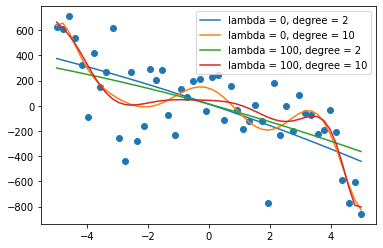

In [417]:
# Vaš kôd ovdje
# calculating:
predicted = []
for l in [0,100]:
    for i in [2, 10]:
        pf = PolynomialFeatures(degree=i)
        design_i = pf.fit_transform(data)
        design_i_T = np.transpose(design_i)
        d_T_d = linalg.multi_dot([design_i_T, design_i])
        arr = np.empty(len(d_T_d))
        arr.fill(l)
        diagonal = np.diag(arr)
        diagonal[0][0] = 0
        
        w_ridge_i = linalg.multi_dot([linalg.inv(d_T_d + diagonal), design_i_T, labels])
        h_ridge_i = linalg.multi_dot([w_ridge_i, design_i_T])
        predicted.append(h_ridge_i)
        
# graphing:
plt.scatter(data, labels)
lambdas = [0,0,100,100]
degrees = [2,10,2,10]
for i in range(4):
    plt.plot(data, predicted[i], label = "lambda = " + str(lambdas[i]) + ", degree = " + str(degrees[i]))
plt.legend()

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


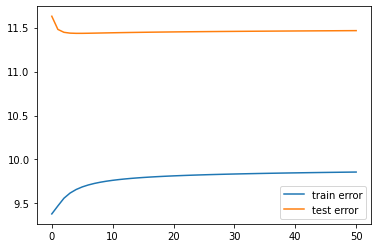

In [442]:
# Vaš kôd ovdje
# calculating:
train_reg, test_reg, labels_train_reg, labels_test_reg = train_test_split(data, labels, test_size=0.5)
E_train_reg = []
E_test_reg = []
for l in range(51):
    pf_i = PolynomialFeatures(degree=10)
    design_i = pf_i.fit_transform(train_reg)
    design_i_T = np.transpose(design_i)
    d_T_d = linalg.multi_dot([design_i_T, design_i])
    arr = np.empty(len(d_T_d))
    arr.fill(l)
    diagonal = np.diag(arr)
    diagonal[0][0] = 0
    w_i = linalg.multi_dot([linalg.inv(d_T_d + diagonal), design_i_T, labels_train_reg])
    
    h_i_train = linalg.multi_dot([w_i, design_i_T])
    E_i_train = sklearn.metrics.mean_squared_error(labels_train_reg, h_i_train)
    E_train_reg.append(E_i_train)
    
    design_i_test = pf_i.fit_transform(test_reg)
    h_i_test = linalg.multi_dot([w_i, np.transpose(design_i_test)])
    E_i_test = sklearn.metrics.mean_squared_error(labels_test_reg, h_i_test)
    E_test_reg.append(E_i_test)

# graphing:
plt.plot(range(51), np.log(E_train_reg), label="train error")
plt.plot(range(51), np.log(E_test_reg), label="test error")
plt.legend()

## Dodatni zadatci

Zadatci u nastavku (označeni zvjezdicom) nisu dio obaveznog dijela laboratorijske vježbe, niti nose bonus bodove. Dakle, nije ih potrebno riješiti kako biste ostvarili 100% bodova na ovoj laboratorijskoj vježbi. Međutim, preporučamo vam da ih pokušate riješiti i na terminu predaje prodiskutirate svoja rješenja s asistentima.

### *5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [ ]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

In [ ]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

In [ ]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje

### *6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [ ]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

In [ ]:
# Vaš kôd ovdje

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [ ]:
# Vaš kôd ovdje

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [ ]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### *7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [ ]:
# Vaš kôd ovdje

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [ ]:
# Vaš kôd ovdje

**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [ ]:
# Vaš kôd ovdje

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.